Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased
dopamine levels in the brain. It manifests itself through a deterioration of movement, including
the presence of tremors and stiffness. There is commonly a marked effect on speech, including
dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced
pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of
the patient and observing motor skills in various situations. Since there is no definitive
laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when
motor effects are not yet severe. Monitoring progression of the disease over time requires
repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t
require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features,
voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms
could be applied to a voice recording dataset to accurately diagnosis PD, this would be an
effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available
at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/ The data consists of
those diagnosed with Parkinson Disease and those who do not.
Steps to be followed:

1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general
idea of likely challenges in the dataset. (2.5 points)
3. Using univariate & bivariate analysis to check the individual attributes for their basic
statistic such as central values, spread, tails etc. What are your observations? (15
points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training
data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted
values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model.
What is the impact on the model accuracy? How does regularization help? (20 points)
8. Next implement the decision tree using Random Forest and find the accuracy (10 points)

# 1. Load the dataset

In [49]:
import numpy as np
import pandas as pd

In [50]:
DF = pd.read_excel('parkinsons.data.xlsx')
DF.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [51]:
DF.shape

(195, 24)

In [52]:
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [53]:
DF.isnull().sum()
# No missing values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [54]:
DF.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [55]:
# Column cardinality 
DF.apply(lambda x: len(x.unique()))

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [56]:
DF['status'].value_counts()
# Imbalance Dataset (one) - Parkinson's, (zero) - healthy

1    147
0     48
Name: status, dtype: int64

In [57]:
# Name column is of no use, we will drop the column
DF.drop('name',axis=1,inplace=True)

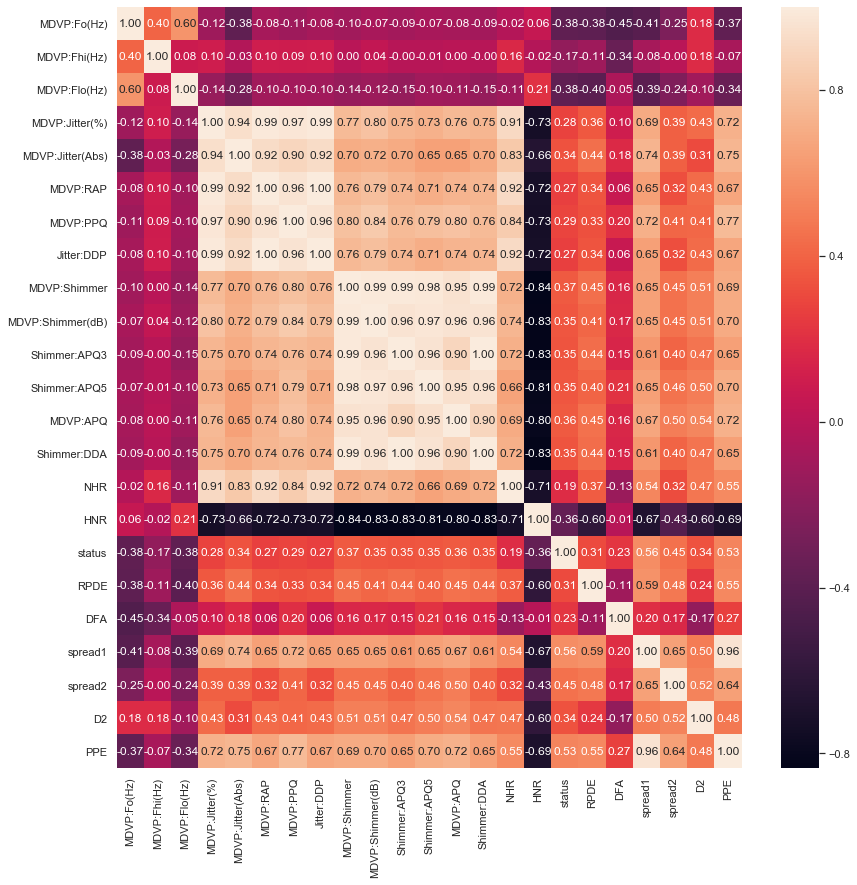

In [59]:
#correlation data
import matplotlib.pyplot as plt
import seaborn as sns
f,ax=plt.subplots(figsize=(14,14))
sns.heatmap(DF.corr(),annot=True,ax=ax,fmt=".2f")
plt.xticks(rotation=90)
plt.show()

From above correlation heatmap, there is high correlation beteen below columns, so we can keep any one column

MDVP:Shimmer     
MDVP:Shimmer(dB)
Shimmer:APQ3    
Shimmer:APQ5    
MDVP:APQ        
Shimmer:DDA     

Also, there is high correlation beteen below columns, so we can keep any one column

MDVP:Jitter(%)  
MDVP:Jitter(Abs)
MDVP:RAP        
MDVP:PPQ        
Jitter:DDP      

Also spead1 and PPE are highly correlated, so we can drop PPE 

C:\Users\nitis\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


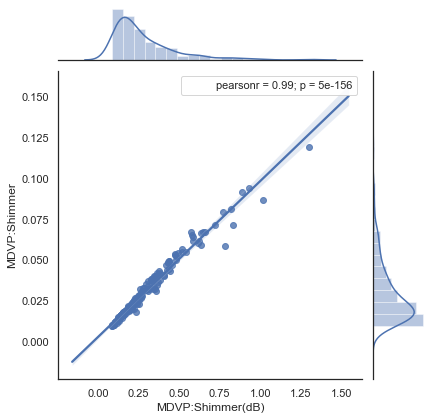

In [60]:
# We can verify using jointplot also - 
import scipy.stats as stats
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    j=sns.jointplot(DF['MDVP:Shimmer(dB)'], DF['MDVP:Shimmer'], kind="reg")
    j.annotate(stats.pearsonr)
    plt.show()

In [61]:
DF.drop(['MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'],axis=1,inplace=True)
DF.drop(['MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP'],axis=1,inplace=True)
DF.drop('PPE',axis=1,inplace=True)

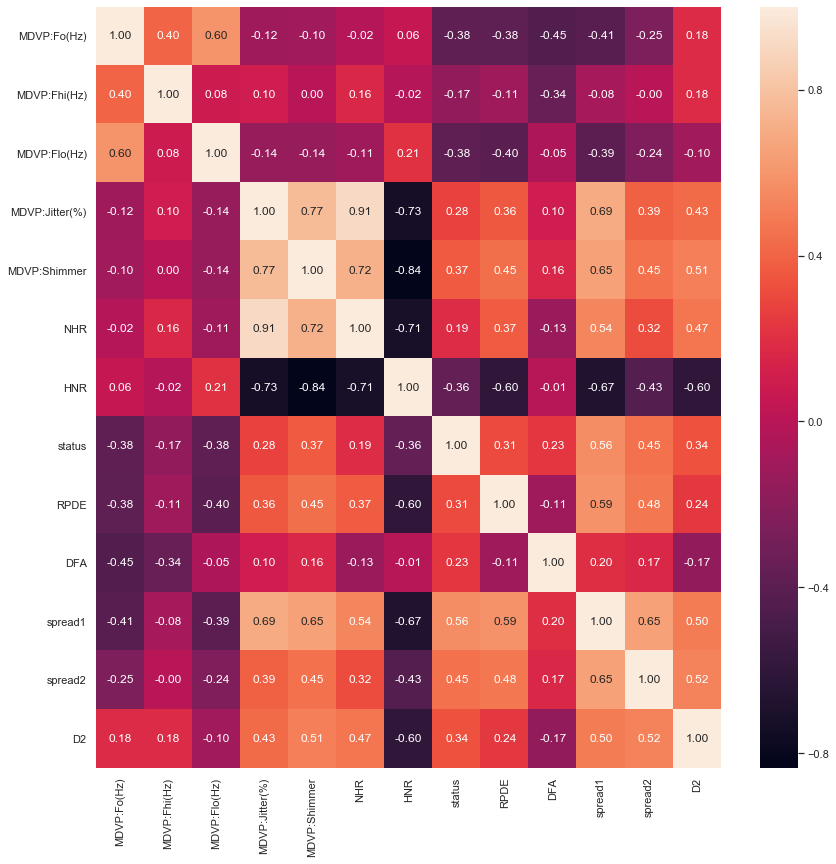

In [62]:
#correlation data
import matplotlib.pyplot as plt
import seaborn as sns
f,ax=plt.subplots(figsize=(14,14))
sns.heatmap(DF.corr(),annot=True,ax=ax,fmt=".2f")
plt.xticks(rotation=90)
plt.show()

In [63]:
DF.shape

(195, 13)

# Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [64]:
#sns.pairplot(DF,diag_kind='kde')

# "MDVP:Fo(Hz)" column analysis

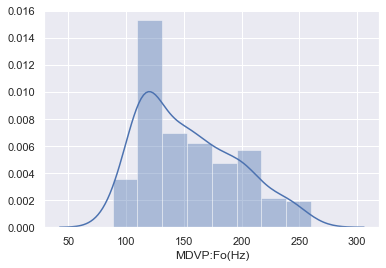

In [65]:
sns.distplot(DF['MDVP:Fo(Hz)'])

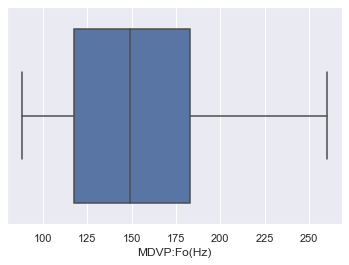

In [66]:
sns.boxplot(DF['MDVP:Fo(Hz)'])

In [67]:
# From above plot this column is right skewed as mean > median and there are no liers 

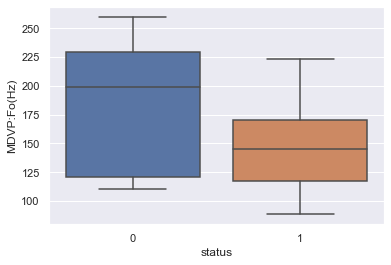

In [68]:
# Bivariate analysis
sns.boxplot(DF['status'],DF['MDVP:Fo(Hz)']) 

In [69]:
# This column value is more for healthy people than people having Parkinson's disease 

# "MDVP:Fhi(Hz)" column analysis

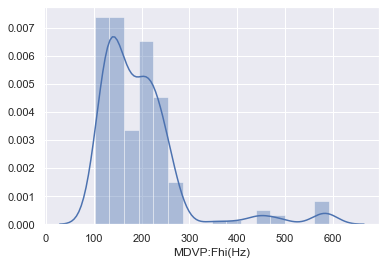

In [70]:
sns.distplot(DF['MDVP:Fhi(Hz)'])

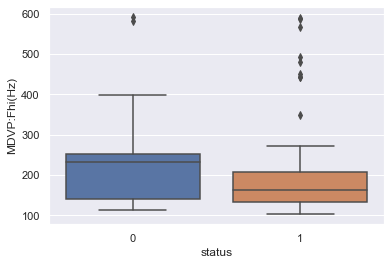

In [71]:
sns.boxplot(DF['status'],DF['MDVP:Fhi(Hz)'])

In [72]:
# From above 2 plots we can see there are few outliers 

In [73]:
Q1 = DF["MDVP:Fhi(Hz)"].quantile(0.25)
Q3 = DF["MDVP:Fhi(Hz)"].quantile(0.75)
IQR = Q3 - Q1
Outliers = (DF["MDVP:Fhi(Hz)"] < (Q1 - 1.5 * IQR)) |(DF["MDVP:Fhi(Hz)"] > (Q3 + 1.5 * IQR))
Outliers[Outliers==True]

73     True
102    True
115    True
116    True
117    True
118    True
120    True
149    True
186    True
187    True
193    True
Name: MDVP:Fhi(Hz), dtype: bool

# "MDVP:Flo(Hz)" column analysis 

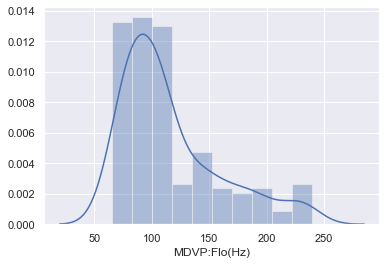

In [74]:
sns.distplot(DF['MDVP:Flo(Hz)'])

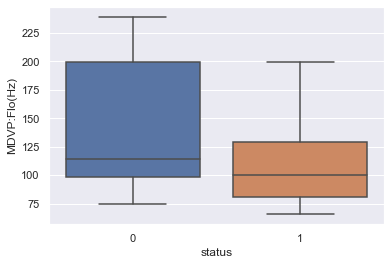

In [75]:
sns.boxplot(DF['status'],DF['MDVP:Flo(Hz)']) 

# MDVP:Jitter(%) column analysis

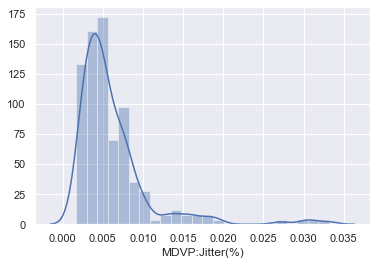

In [76]:
sns.distplot(DF['MDVP:Jitter(%)'])

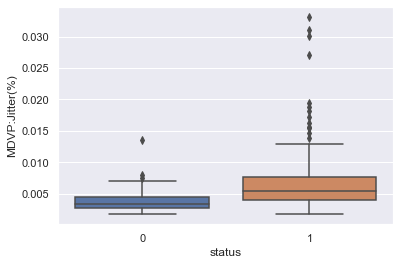

In [77]:
sns.boxplot(DF['status'],DF['MDVP:Jitter(%)'])

In [78]:
# Here MDVP:Jitter(%) value is more for Parkinson's disease person than healthy person 

# MDVP:Shimmer column analysis

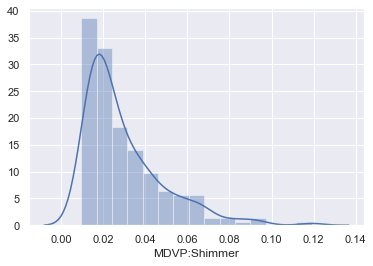

In [79]:
sns.distplot(DF['MDVP:Shimmer'])

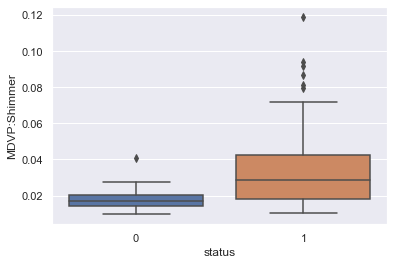

In [80]:
sns.boxplot(DF['status'],DF['MDVP:Shimmer']) 

# NHR column analysis

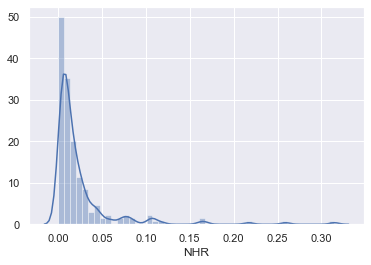

In [81]:
sns.distplot(DF['NHR'])

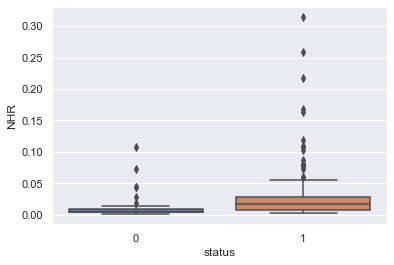

In [82]:
sns.boxplot(DF['status'],DF['NHR']) 

In [83]:
# From above plot NHR column right skewed

# HNR column analysis

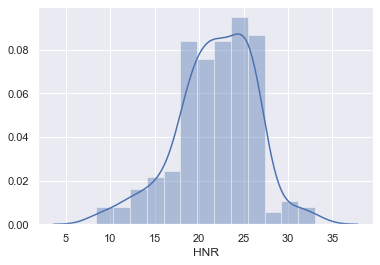

In [84]:
sns.distplot(DF['HNR'])

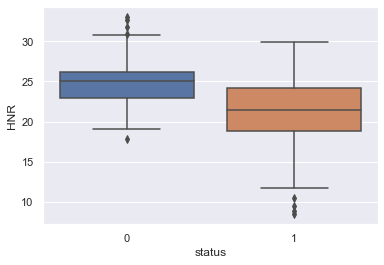

In [85]:
sns.boxplot(DF['status'],DF['HNR']) 

In [86]:
# From above plot HNR is left skewed and is high for healthy people than PD people 

# RPDE column analysis

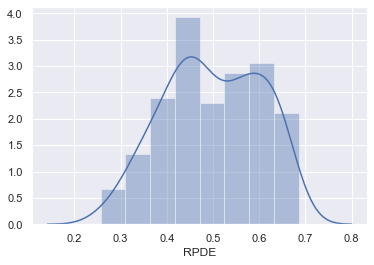

In [87]:
sns.distplot(DF['RPDE'])

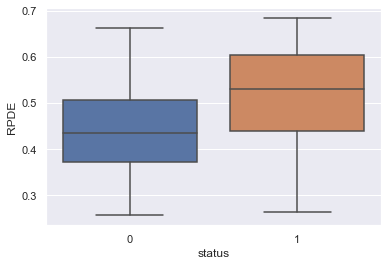

In [88]:
sns.boxplot(DF['status'],DF['RPDE']) 

# DFA column analysis

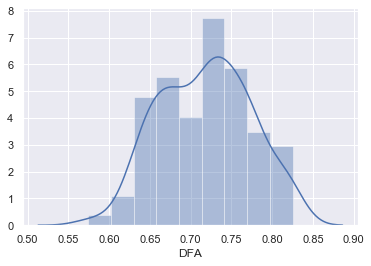

In [89]:
sns.distplot(DF['DFA'])

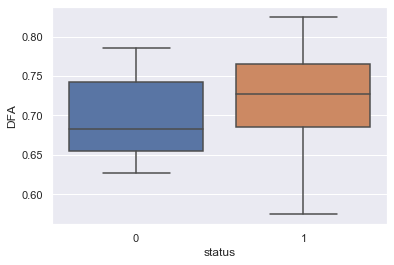

In [90]:
sns.boxplot(DF['status'],DF['DFA']) 

# spread1 column analysis

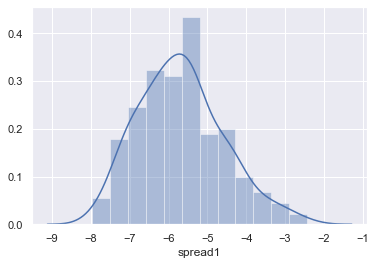

In [91]:
sns.distplot(DF['spread1'])

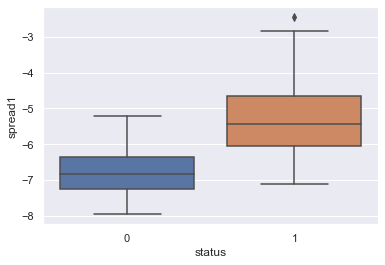

In [92]:
sns.boxplot(DF['status'],DF['spread1']) 

# spread2 column analysis

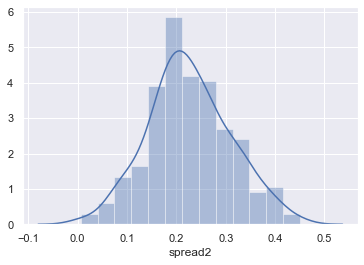

In [93]:
sns.distplot(DF['spread2'])

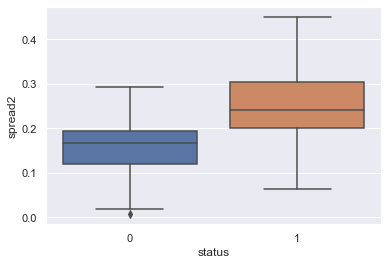

In [94]:
sns.boxplot(DF['status'],DF['spread2']) 

# D2 column analysis

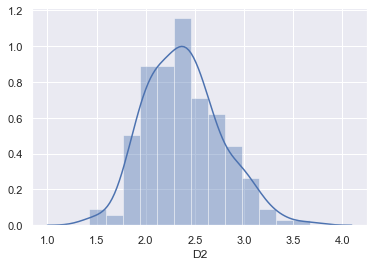

In [95]:
sns.distplot(DF['D2'])

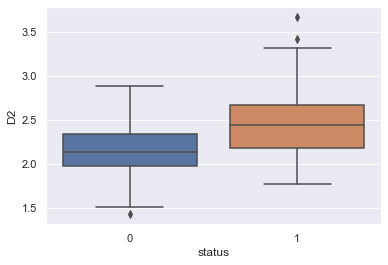

In [96]:
sns.boxplot(DF['status'],DF['D2']) 

# Replace outliers with median from all feature columns

In [98]:
DF_X = DF.drop('status',axis=1)
def replace(col):
    median, std = col.median(), col.std()  #Get the median and the standard deviation of every group 
    outliers = (col - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    col[outliers] = col.median()       
    return col

for i in range(0,12):
    no_outlier=DF_X.iloc[:,i].transform(replace)

In [100]:
DF_Y = DF[['status']]

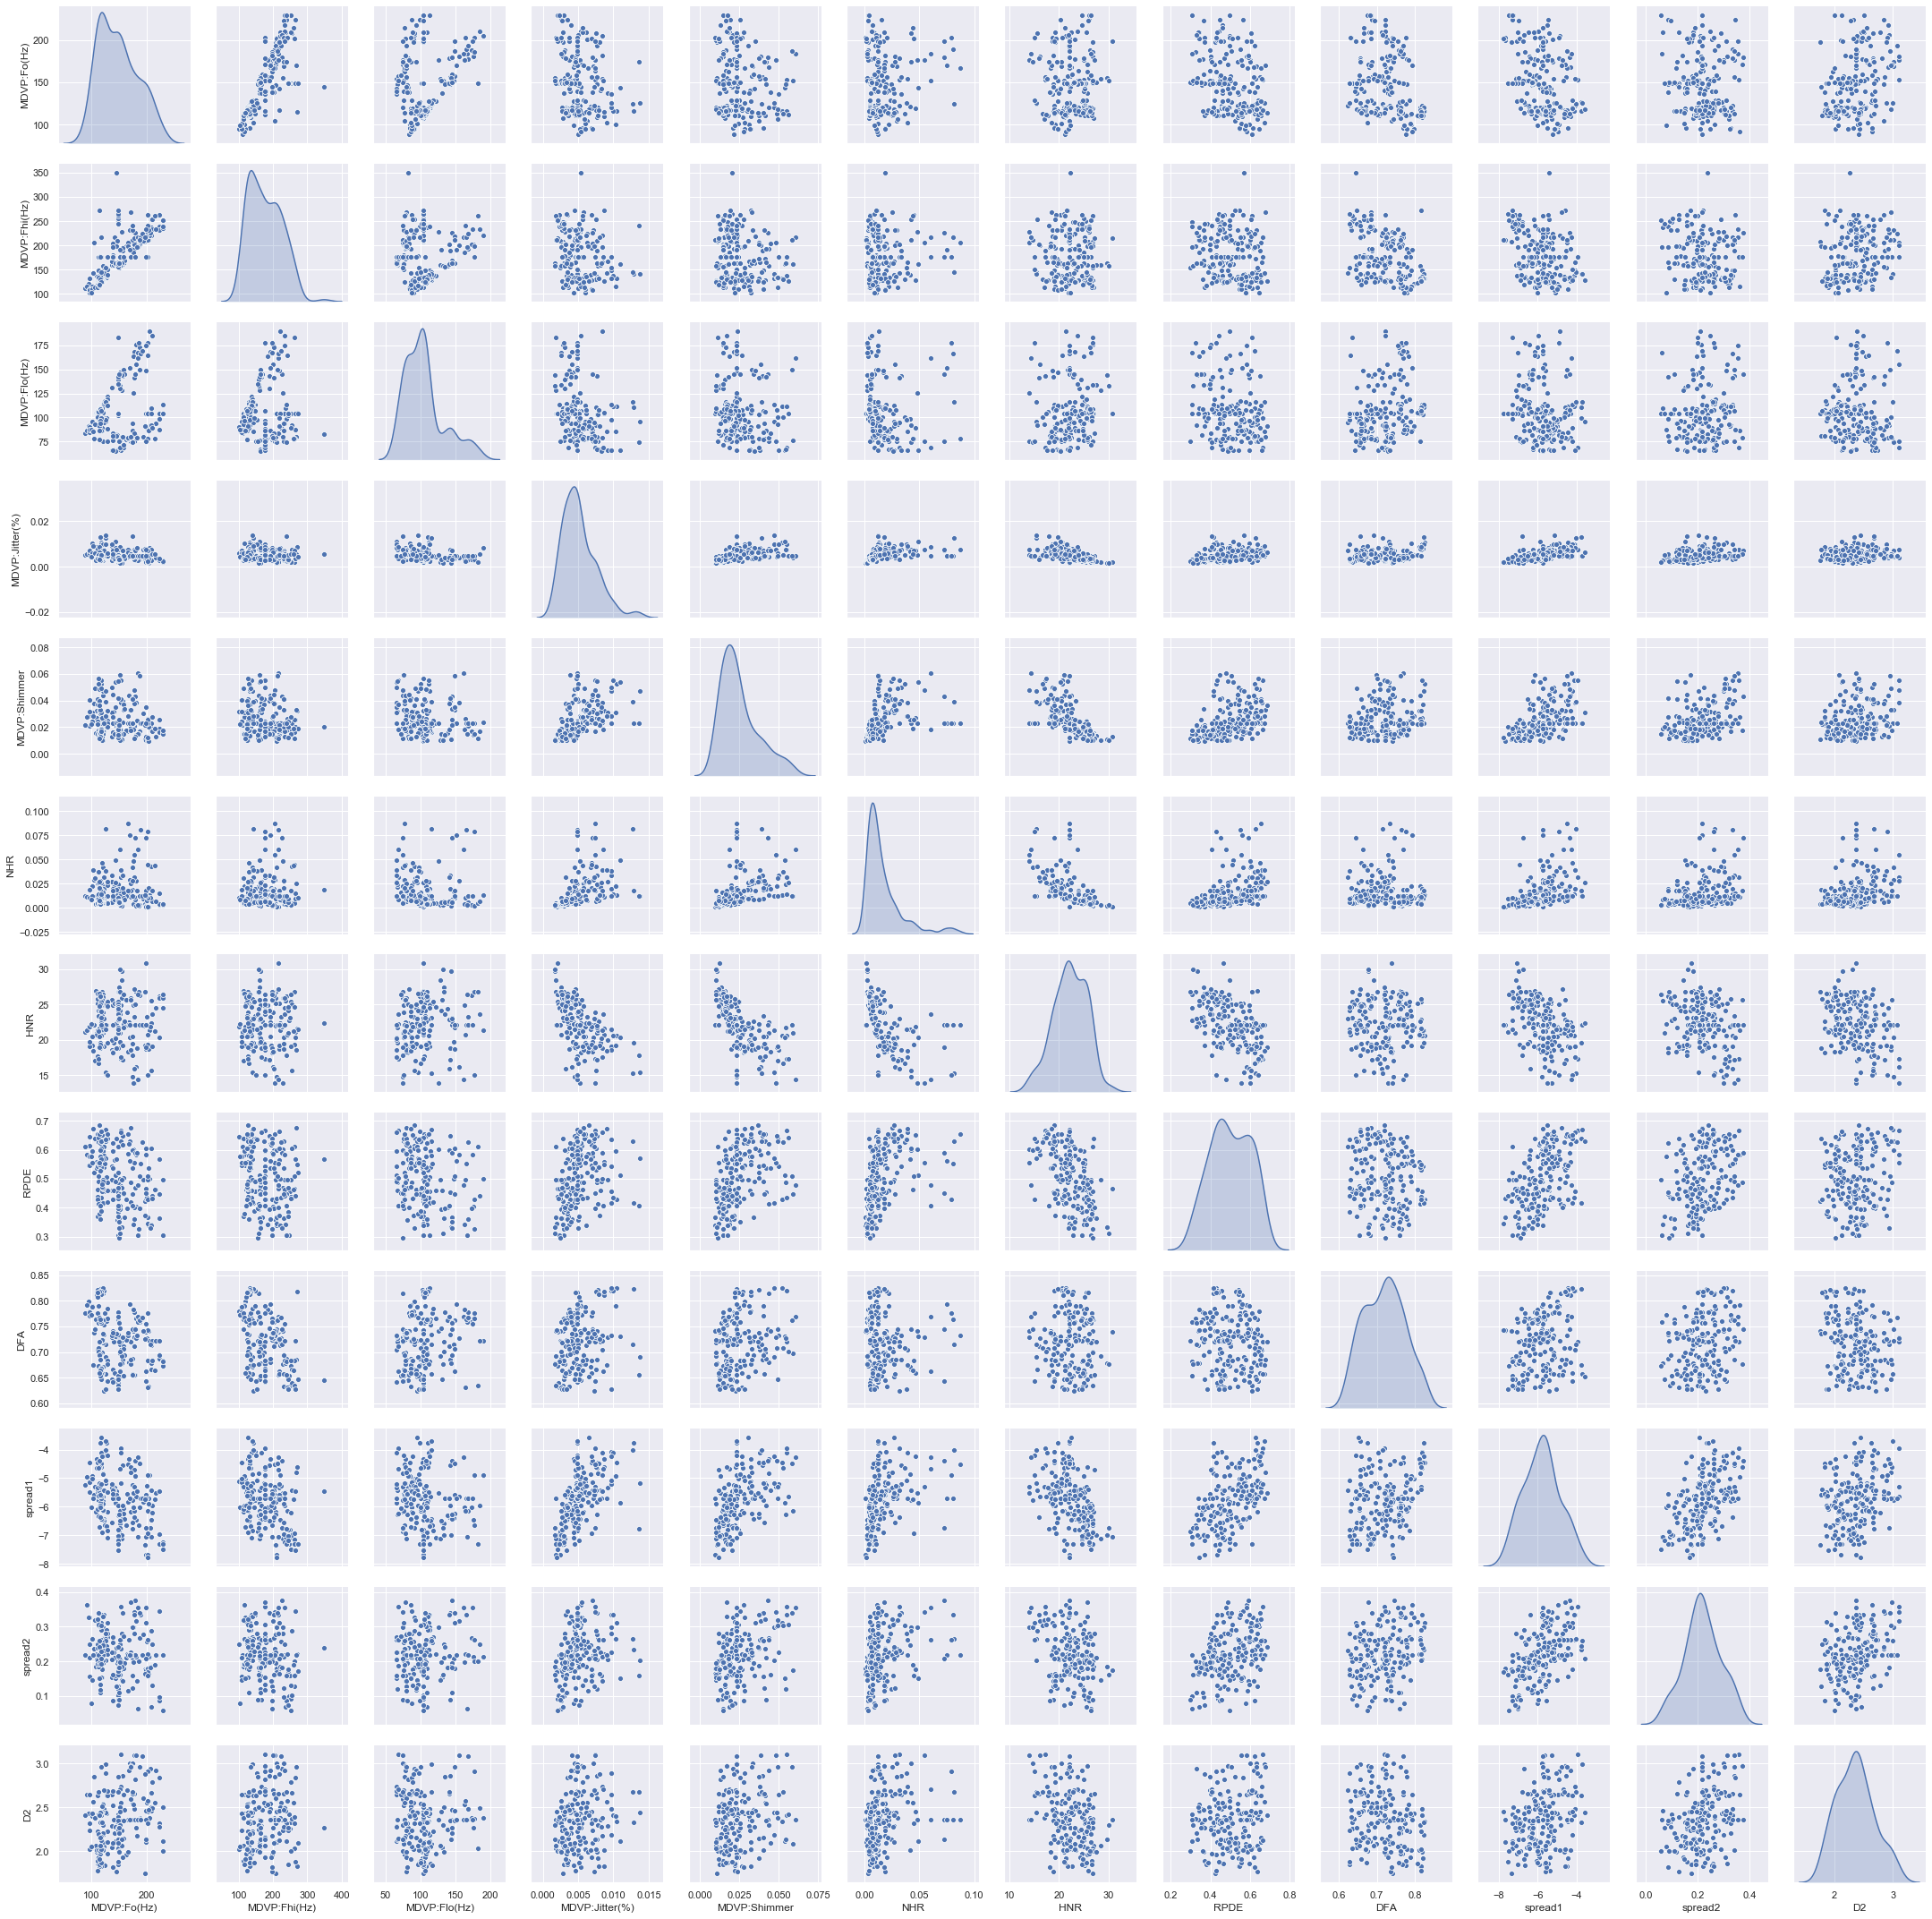

In [99]:
sns.pairplot(DF_X,diag_kind='kde')

# Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF_X, DF_Y, test_size=0.30, random_state=1)

# Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [103]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 13 columns):
MDVP:Fo(Hz)       195 non-null float64
MDVP:Fhi(Hz)      195 non-null float64
MDVP:Flo(Hz)      195 non-null float64
MDVP:Jitter(%)    195 non-null float64
MDVP:Shimmer      195 non-null float64
NHR               195 non-null float64
HNR               195 non-null float64
status            195 non-null int64
RPDE              195 non-null float64
DFA               195 non-null float64
spread1           195 non-null float64
spread2           195 non-null float64
D2                195 non-null float64
dtypes: float64(12), int64(1)
memory usage: 19.9 KB


In [106]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [110]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [111]:
print('Training accuracy',dt_model.score(X_train , y_train))
print('Test accuracy',dt_model.score(X_test , y_test))

Training accuracy 1.0
Test accuracy 0.864406779661017


In [108]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                     Imp
MDVP:Fo(Hz)     0.156760
MDVP:Fhi(Hz)    0.000000
MDVP:Flo(Hz)    0.150960
MDVP:Jitter(%)  0.000000
MDVP:Shimmer    0.127335
NHR             0.000000
HNR             0.000000
RPDE            0.000000
DFA             0.155963
spread1         0.294035
spread2         0.114948
D2              0.000000


In [112]:
test_pred = dt_model.predict(X_test)

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred)
print(confusion_matrix)

[[13  6]
 [ 2 38]]


In [119]:
TN=13
FP=6
FN=2
TP=38
Accuracy = (TN+TP)/(TN+FP+FN+TP)
print('Accuracy = ',Accuracy)
Precision = TP/(TP+FP) 
print('Precision = ',Precision)
Recall = TP/(TP+FN) 
print('Recall = ',Recall)
F1_score = 2*Precision*Recall/(Precision+Recall)
print('F1score = ',F1_score)

Accuracy =  0.864406779661017
Precision =  0.8636363636363636
Recall =  0.95
F1score =  0.9047619047619048


# Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [120]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 ) 

In [121]:
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [122]:
print('Training accuracy',dt_model2.score(X_train , y_train))
print('Test accuracy',dt_model2.score(X_test , y_test))

Training accuracy 0.9632352941176471
Test accuracy 0.9322033898305084


In [123]:
# Regularization reduce overfit as in overfit training accuarcy will be more but test accuarcy will be reduced

# Next implement the decision tree using Random Forest and find the accuracy (10 points)

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 6,random_state=1)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
print('Training accuracy',rfcl.score(X_train , y_train))
print('Test accuracy',rfcl.score(X_test , y_test))

Training accuracy 0.9705882352941176
Test accuracy 0.8135593220338984


C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


DecisionTree: 0.886249 (0.011195)
DecisionTree_Regularised: 0.878313 (0.010523)
RandomForest: 0.847326 (0.006795)


C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

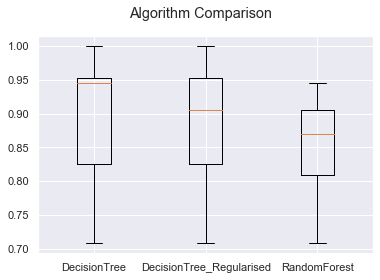

In [151]:
from sklearn import model_selection
models = []
models.append(('DecisionTree', dt_model))
models.append(('DecisionTree_Regularised', dt_model2))
models.append(('RandomForest', rfcl))
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# RandomForest has less variance of 0.006795